## Examples and Syntax ##

In [2]:
import fastf1 as f1
import fastf1.plotting
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fastf1.plotting.setup_mpl()
session = f1.get_session(2021, 'Monza', 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (111.82 MB) /Users/peterclark/Library/Caches/fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5', '99', '88', '4

In [6]:

leclerc = session.laps.pick_driver('LEC').pick_fastest()
leclerc_car = leclerc.get_car_data()
t = leclerc_car['Time']
vel = leclerc_car['Speed']

ver = session.laps.pick_driver('VER').pick_fastest()
ver_car = ver.get_car_data()
t_max = ver_car['Time']
vel_max = ver_car['Speed']


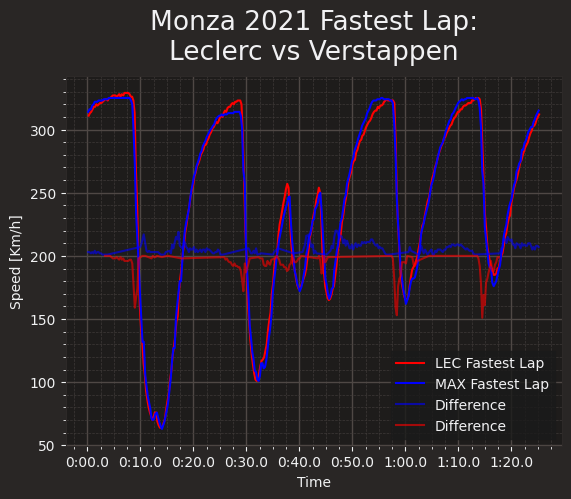

In [9]:
fig, ax = plt.subplots()
diff = (vel_max-vel[:-2])+200
ax.plot(t, vel, label="LEC Fastest Lap", color='red')
ax.plot(t_max, vel_max, label="MAX Fastest Lap", color='blue')
ax.plot(t_max[diff>200], diff[diff>200], label="Difference", color='blue', alpha=0.6)
ax.plot(t_max[diff<=200], diff[diff<=200], label="Difference", color='red', alpha=0.6)
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('Monza 2021 Fastest Lap:\nLeclerc vs Verstappen')
ax.legend()
plt.show()

In [12]:
## schedule

schedule=f1.get_event_schedule(2021)
schedule


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Bahrain,FORMULA 1 ARAMCO PRE-SEASON TESTING 2021,2021-03-14,Pre-Season Test,testing,Practice 1,2021-03-12 10:00:00+03:00,2021-03-12 07:00:00,...,Practice 3,2021-03-14 10:00:00+03:00,2021-03-14 07:00:00,None,NaT,NaT,None,NaT,NaT,False
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021,2021-03-28,Bahrain Grand Prix,conventional,Practice 1,2021-03-26 14:30:00+03:00,2021-03-26 11:30:00,...,Practice 3,2021-03-27 15:00:00+03:00,2021-03-27 12:00:00,Qualifying,2021-03-27 18:00:00+03:00,2021-03-27 15:00:00,Race,2021-03-28 18:00:00+03:00,2021-03-28 15:00:00,True
2,2,Italy,Imola,FORMULA 1 PIRELLI GRAN PREMIO DEL MADE IN ITAL...,2021-04-18,Emilia Romagna Grand Prix,conventional,Practice 1,2021-04-16 11:00:00+02:00,2021-04-16 09:00:00,...,Practice 3,2021-04-17 11:00:00+02:00,2021-04-17 09:00:00,Qualifying,2021-04-17 14:00:00+02:00,2021-04-17 12:00:00,Race,2021-04-18 15:00:00+02:00,2021-04-18 13:00:00,True
3,3,Portugal,Portimão,FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2021,2021-05-02,Portuguese Grand Prix,conventional,Practice 1,2021-04-30 11:30:00+01:00,2021-04-30 10:30:00,...,Practice 3,2021-05-01 12:00:00+01:00,2021-05-01 11:00:00,Qualifying,2021-05-01 15:00:00+01:00,2021-05-01 14:00:00,Race,2021-05-02 15:00:00+01:00,2021-05-02 14:00:00,True
4,4,Spain,Barcelona,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2021,2021-05-09,Spanish Grand Prix,conventional,Practice 1,2021-05-07 11:30:00+02:00,2021-05-07 09:30:00,...,Practice 3,2021-05-08 12:00:00+02:00,2021-05-08 10:00:00,Qualifying,2021-05-08 15:00:00+02:00,2021-05-08 13:00:00,Race,2021-05-09 15:00:00+02:00,2021-05-09 13:00:00,True
5,5,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2021,2021-05-23,Monaco Grand Prix,conventional,Practice 1,2021-05-20 11:30:00+02:00,2021-05-20 09:30:00,...,Practice 3,2021-05-22 12:00:00+02:00,2021-05-22 10:00:00,Qualifying,2021-05-22 15:00:00+02:00,2021-05-22 13:00:00,Race,2021-05-23 15:00:00+02:00,2021-05-23 13:00:00,True
6,6,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2021,2021-06-06,Azerbaijan Grand Prix,conventional,Practice 1,2021-06-04 12:30:00+04:00,2021-06-04 08:30:00,...,Practice 3,2021-06-05 13:00:00+04:00,2021-06-05 09:00:00,Qualifying,2021-06-05 16:00:00+04:00,2021-06-05 12:00:00,Race,2021-06-06 16:00:00+04:00,2021-06-06 12:00:00,True
7,7,France,Le Castellet,FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021,2021-06-20,French Grand Prix,conventional,Practice 1,2021-06-18 11:30:00+02:00,2021-06-18 09:30:00,...,Practice 3,2021-06-19 12:00:00+02:00,2021-06-19 10:00:00,Qualifying,2021-06-19 15:00:00+02:00,2021-06-19 13:00:00,Race,2021-06-20 15:00:00+02:00,2021-06-20 13:00:00,True
8,8,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS DER STEIERMARK 2021,2021-06-27,Styrian Grand Prix,conventional,Practice 1,2021-06-25 11:30:00+02:00,2021-06-25 09:30:00,...,Practice 3,2021-06-26 12:00:00+02:00,2021-06-26 10:00:00,Qualifying,2021-06-26 15:00:00+02:00,2021-06-26 13:00:00,Race,2021-06-27 15:00:00+02:00,2021-06-27 13:00:00,True
9,9,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS VON ÖSTERREICH 2021,2021-07-04,Austrian Grand Prix,conventional,Practice 1,2021-07-02 11:30:00+02:00,2021-07-02 09:30:00,...,Practice 3,2021-07-03 12:00:00+02:00,2021-07-03 10:00:00,Qualifying,2021-07-03 15:00:00+02:00,2021-07-03 13:00:00,Race,2021-07-04 15:00:00+02:00,2021-07-04 13:00:00,True


In [13]:
schedule.columns

# .get_event_by_name
# .get_event_by_round

Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date',
       'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc',
       'Session3', 'Session3Date', 'Session3DateUtc', 'Session4',
       'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date',
       'Session5DateUtc', 'F1ApiSupport'],
      dtype='object')

In [15]:
session.results
session.results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [16]:
session.results.iloc[0:10].loc[:, ['Abbreviation', 'Q3']]

,Abbreviation,Q3
3,RIC,NaT
4,NOR,NaT
77,BOT,NaT
16,LEC,NaT
11,PER,NaT
55,SAI,NaT
18,STR,NaT
14,ALO,NaT
63,RUS,NaT
31,OCO,NaT


In [19]:
session.laps
#session.laps.columns

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:16.958000,GAS,10,0 days 00:02:02.171000,1.0,1.0,0 days 01:02:22.702000,0 days 01:00:55.481000,NaT,0 days 00:00:31.018000,...,True,AlphaTauri,0 days 01:02:14.632000,2021-09-12 13:03:16.241,1267,19.0,False,,False,False
1,0 days 01:05:45.963000,GAS,10,0 days 00:01:29.005000,2.0,1.0,NaT,NaT,0 days 00:00:28.594000,0 days 00:00:30.877000,...,True,AlphaTauri,0 days 01:04:16.958000,2021-09-12 13:05:18.567,1,18.0,False,,False,True
2,0 days 01:07:35.136000,GAS,10,0 days 00:01:49.173000,3.0,1.0,NaT,0 days 01:07:31.414000,0 days 00:00:28.479000,0 days 00:00:37.644000,...,True,AlphaTauri,0 days 01:05:45.963000,2021-09-12 13:06:47.572,1,18.0,False,,False,False
3,0 days 01:04:05.139000,PER,11,0 days 00:01:50.352000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:31.553000,...,True,Red Bull Racing,0 days 01:02:14.632000,2021-09-12 13:03:16.241,1267,8.0,False,,False,False
4,0 days 01:05:32.745000,PER,11,0 days 00:01:27.606000,2.0,1.0,NaT,NaT,0 days 00:00:29.036000,0 days 00:00:29.775000,...,True,Red Bull Racing,0 days 01:04:05.139000,2021-09-12 13:05:06.748,71,7.0,False,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0 days 02:18:52.465000,GIO,99,0 days 00:01:26.226000,49.0,3.0,NaT,NaT,0 days 00:00:28.374000,0 days 00:00:29.317000,...,True,Alfa Romeo Racing,0 days 02:17:26.239000,2021-09-12 14:18:27.848,1,13.0,False,,False,True
888,0 days 02:20:18.183000,GIO,99,0 days 00:01:25.718000,50.0,3.0,NaT,NaT,0 days 00:00:27.901000,0 days 00:00:29.181000,...,True,Alfa Romeo Racing,0 days 02:18:52.465000,2021-09-12 14:19:54.074,1,13.0,False,,False,True
889,0 days 02:21:44.042000,GIO,99,0 days 00:01:25.859000,51.0,3.0,NaT,NaT,0 days 00:00:28.136000,0 days 00:00:29.331000,...,True,Alfa Romeo Racing,0 days 02:20:18.183000,2021-09-12 14:21:19.792,1,13.0,False,,False,True
890,0 days 02:23:10.195000,GIO,99,0 days 00:01:26.153000,52.0,3.0,NaT,NaT,0 days 00:00:28.041000,0 days 00:00:29.383000,...,True,Alfa Romeo Racing,0 days 02:21:44.042000,2021-09-12 14:22:45.651,1,13.0,False,,False,True
